# PHYS 481 Assignment 5: Monte Carlo Methods 1
## Oct 31 before class starts (15:30)

### Monica A. Bellamy (3009896)
### Sachin Sharma (30118711)
### Max Stronge (30064749) 


This assignment will introduce some basic concepts in Monte Carlo methods. Remember to write an
introduction [2 pts] and conclusion [2 pts].

In [1]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
------------
<span style="color:palevioletred;"> In this assignment, we explore of probabilistic and computational challenges via Monte Carlo simulations. The task consists of four distinct questions, each probing different aspects of probability, estimation, and numerical integration. From analyzing game show strategies to investigating the birthday paradox, estimating high-dimensional hypersphere volumes, and conducting Monte Carlo integration in varying dimensions, we aim to gain a nuanced understanding of fundamental principles. Our objective is to derive probabilities and calculations while providing insightful commentary on the results.

## Question 1 [4 pts]

On a game show, a prize is randomly placed behind 1 of 3 doors and the contestant is asked to guess
which door hides the prize. After the contestant guesses, the host opens one of the 2 remaining doors:
the one they know does not contain the prize (if neither door contains the prize, they open one at
random). The contestant may then choose to change their guess or stick with their original guess before
the prize is revealed. They win the prize if their final guess is correct. Given 2 contestants, one of whom
always changes their guess and one who never changes their guess, how often is each expected to win?

• Simulate this problem using at least 100 thousand trials. Report the 2 probabilities and give a standard uncertainty in your estimate.

• You may assume that the prize is hidden behind the door you label as “door 1”. Since the labelling is arbitrary, that does not affect the generality of the result and may be easier to code.

• See lecture slides for more discussion.

• Comment on your results. Does this agree with your intuition? Can you explain it?

Probability of winning without changing guess: 0.33449
Probability of winning by always changing guess: 0.66551


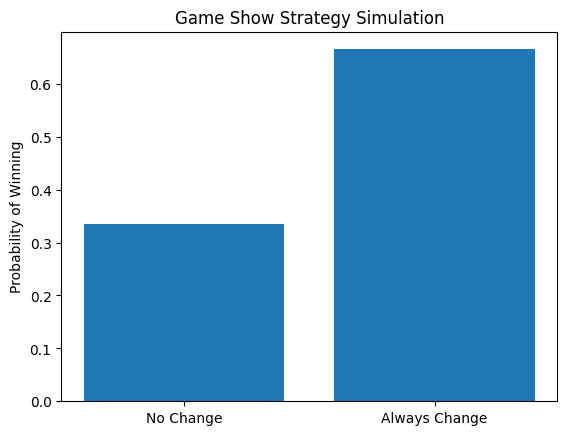

In [6]:
# Question 1

def game_show_simulation(num_trials):
    """Simulate the game show scenario with two contestants: one who never changes their guess,
    and one who always changes. Calculate the probabilities of winning for both strategies.

    Parameters:
    num_trials (integer): Number of simulation trials.

    Returns:
    - Probability of winning without changing guess (float)
    - and probability of winning by always changing guess (also float)
    """
    # Generate random prize locations and initial guesses
    prize_locations = np.random.randint(1, 4, num_trials)
    initial_guesses = np.random.randint(1, 4, num_trials)
    opened_doors = np.zeros(num_trials, dtype=int)

    # Simulate the host opening doors
    for i in range(num_trials):
        remaining_doors = [1, 2, 3]
        remaining_doors.remove(initial_guesses[i])
        if prize_locations[i] != initial_guesses[i]:
            remaining_doors.remove(prize_locations[i])
        opened_doors[i] = np.random.choice(remaining_doors)

    # Contestant who never changes their guess
    win_count_no_change = np.sum(initial_guesses == prize_locations)

    # Contestant who always changes their guess
    new_guesses = 6 - initial_guesses - opened_doors
    win_count_change = np.sum(new_guesses == prize_locations)

    probability_no_change = win_count_no_change / num_trials
    probability_change = win_count_change / num_trials

    return probability_no_change, probability_change

def plot_results(probabilities):
    """Plot the results of the game show simulation.

    Parameters:
    - probabilities (float): Probabilities of winning for different strategies.
    """
    strategies = ['No Change', 'Always Change']

    # Plotting Properties
    plt.bar(strategies, probabilities)
    plt.ylabel('Probability of Winning')
    plt.title('Game Show Strategy Simulation')
    plt.show()

# Perform the simulation with at least 100,000 trials according to assignment
num_trials = 100000
probability_no_change, probability_change = game_show_simulation(num_trials)

# This is to easily visualize and indicate the results
print("Probability of winning without changing guess:", probability_no_change)
print("Probability of winning by always changing guess:", probability_change)

# Call helper function 'plot_results()' to plot the results :D
plot_results([probability_no_change, probability_change])

Comments #1
-----------------
Comment on your results. Does this agree with your intuition? Can you explain it?

<span style="color:palevioletred;"> The simulation results contradicts my initial intuition since after the game show host opens one of the doors without a prize in it, I would think that you had a 50/50 chance between the two remaining doors, regardless of strategy. But clearly this is not the case! In actuality, the person who always changes their answer has ~2/3 chance to win while the person who never chanegs has ~1/3 chance to win.

<span style="color:palevioletred;"> To explain, lets start with the person with no change. From the beginning, they indeed have a ~1/3 chance to have the correct guess, ~2/3 chance to have the incorrect guess, and not changing their answer means that this probability stays the same throughout. On the other hand, the person who always changes their guess still has the same starting probability of being correct as the first person of ~1/3. But when the host reveals one of the wrong answers (doors), the current guess still has ~2/3 chance to lose just like the first person since it stays the same throughout. Therefore, switching is the better strategy because it capitalizes on that initial 2/3 probability of making the wrong choice. 

<span style="color:palevioletred;"> In simpler terms, you're most likely to be incorrect ~2/3 of the time. But after the host reveals one of the incorrect answers, it is basically removing 1/3 from your likelihood of being incorrect. Consequently increasing your chance of winning by the same amount. If you had ~1/3 chance of winning, then it must go up to ~2/3 which is what is illustrated in our results!

## Question 2 [4 pts]

Given a room with 𝑁 people in it, what is the probability that at least 2 of them share the same
birthday?

• Simulate this problem (don’t compute the analytic result) for 𝑁 up to 50 and graph the probability as a function of 𝑁, including 2𝜎 error bars.

• Choose the number of Monte Carlo iterations for each simulation so that the error bars are small but visible on the graph.

• You may neglect February 29th birthdays.

• Include a brief (few sentence) commentary on your graph. What’s plotted, and what should the reader see in the plot?

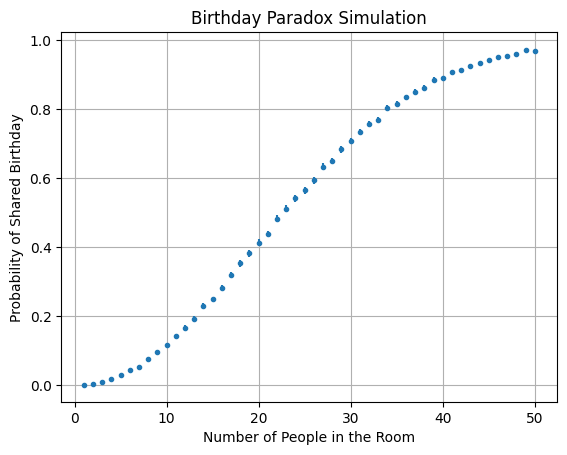

In [11]:
# Question 2

def birthday_simulation(num_people, num_simulations):
    """Simulate the birthday paradox for a given number of people in a room.

    Parameters:
    - num_people (int): Number of people in the room.
    - num_simulations (int): Number of Monte Carlo simulations to perform.

    Returns:
    - float: Probability that at least 2 people share a birthday."""

    shared_birthday_count = 0   # Counter to keep track of how many people share a birthday

    # Perform Monte Carlo simulations
    for _ in range(num_simulations):
        # Simulate birthdays for people in the room (1 to 365, excluding February 29)
        birthdays = np.random.randint(1, 366, num_people)
        
        # Count the unique birthdays
        unique_birthdays = len(np.unique(birthdays))
        
        # If there are shared birthdays, increment the count
        if unique_birthdays < num_people:
            shared_birthday_count += 1

    # Calculate the probability of shared birthdays
    probability = shared_birthday_count / num_simulations
    return probability

def plot_birthday_paradox():
    """Plot the results of the birthday paradox simulations for different numbers of people in the room."""

    # Set the number of Monte Carlo simulations
    num_simulations = 10000

    # Initialize lists to store N (number of people) and corresponding probabilities
    N_values = list(range(1, 51))
    probabilities = []

    # Perform simulations for different values of N
    for N in N_values:
        probability = birthday_simulation(N, num_simulations)
        probabilities.append(probability)

    # Calculate standard errors (2σ) for the probabilities
    std_errors = 2 * np.sqrt(np.array(probabilities) * (1 - np.array(probabilities)) / num_simulations)

    # Plot the results
    plt.errorbar(N_values, probabilities, yerr=std_errors, fmt='o', markersize=3)

    # Plot Properties
    plt.xlabel('Number of People in the Room')
    plt.ylabel('Probability of Shared Birthday')
    plt.title('Birthday Paradox Simulation')
    plt.grid(True)
    plt.show()

# Call the helper finction 'plot_birthday_paradox()'
plot_birthday_paradox()

Comments #2
-----------------
Include a brief (few sentence) commentary on your graph. What’s plotted, and what should the reader see in the plot?


<span style="color:palevioletred;"> The graph illustrates the probability of at least two people sharing a birthday as the number of people in the room increases. The error bars represent 2σ uncertainties in the estimates. As the graph shows, the probability rises significantly as more people are added to the room. It's natural to think that there are 365 days in a year, so it should take many more people to have a shared birthday. However, the counterintuitive part is that you don't need a large group for this to be likely. What the reader should observe is a clear upward trend, highlighting the counterintuitive nature of the birthday paradox: it takes fewer people than expected to have a high chance of shared birthdays. This intriguing phenomenon is what the plot effectively communicates.

## Question 3 [4 pts]
Use Monte Carlo sampling to estimate the volume of a unit hypersphere of dimension 𝑛 up to 𝑛 =15.
Plot the volume versus 𝑛 including 2𝜎 error bars and include the analytic result on the plot. The analytic
result in recursive form is:

𝑉𝑛 = 1 𝑖𝑓 𝑛 = 0

𝑉𝑛 = 2 𝑖𝑓 𝑛 = 1
 
𝑉𝑛 = 2𝜋/𝑛 * 𝑉𝑛−2 𝑜𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒

• Choose the number of Monte Carlo iterations for each simulation so that the error bars are small but at least some are visible on the graph.

• Include a brief (few sentence) commentary on your graph. What’s plotted, and what should the reader see in the plot?

In [ ]:
# Question 3

Comments #3
-----------------
Include a brief (few sentence) commentary on your graph. What’s plotted, and what should the reader see in the plot?

<span style="color:palevioletred;"> stuff

## Question 4 [4 pts]
Define the radius 𝑟 in 𝑛 dimensions as 𝑟 = √∑ 𝑥𝑖
2𝑛
𝑖=1 .

a) [2 pts] Calculate the integral
∫ 𝑟(𝑥𝑖)𝑑𝑛𝑥 over the unit hypercube in 3, 4, 10 and 100 dimensions using a simple Monte Carlo integration. Report the standard uncertainty for each estimate, and make sure it’s less than 0.1% of the value. Display your results as a table.

b) [1 pt] Repeat part a over the cube extending from 0 to 2 in each dimension.
c) [1 pt] If you tried to do part a using a more conventional numerical integration scheme (e.g. rectangle rule or midpoint rule) sampled on a regular grid, what problem would you run into?

In [ ]:
# Question 4

Comments #4
-----------------
i) Report the standard uncertainty for each estimate, and make sure it’s less than 0.1% of the value. Display your results as a table.

ii) If you tried to do part a using a more conventional numerical integration scheme (e.g. rectangle rule or midpoint rule) sampled on a regular grid, what problem would you run into?

<span style="color:palevioletred;"> stuff

## Conclusion

<span style="color:palevioletred;"> In conclusion, 